In [317]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from sklearn.preprocessing import MinMaxScaler

# descomentar para graficos aparecerem no github
# import plotly.io as pio
# pio.renderers.default = 'png'    #@param ['svg', 'colab', 'vscode' ]

In [318]:
carteira = 'ibra50'

In [319]:
url0 = 'https://raw.githubusercontent.com/BDonadelli/Finance-playground/refs/heads/main/data/'

url  = {'ibra50' :url0+'Cart_IBr50.csv',
        'ibra100':url0+'Cart_IBr100.csv',
        'idiv'   :url0+'Cart_Idiv.csv',
        'ibov'   :url0+'Cart_Ibov.csv',
        'small'  :url0+'Cart_Small.csv'
}
indice = pd.read_csv(url[carteira] ,
                     sep=';' , decimal=',' , thousands='.' ,
                     skiprows=1,skipfooter=2,
                     encoding='latin-1',
                     index_col=False , engine='python')

indice

,Código,Ação,Tipo,Qtde. Teórica,Part. (%)
0,ABEV3,AMBEV S/A,ON,4394835131,3.115
1,ASAI3,ASSAI,ON ED NM,1345832968,0.624
2,AZUL4,AZUL,PN N2,326872005,0.032
3,AZZA3,AZZAS 2154,ON NM,136643320,0.209
4,B3SA3,B3,ON NM,5392540963,3.632
5,BBSE3,BBSEGURIDADE,ON NM,637332335,1.348
6,BBDC4,BRADESCO,PN N1,5129958973,3.452
7,BBAS3,BRASIL,ON NM,2842613858,4.005
8,BRAV3,BRAVA,ON NM,460791208,0.429
9,BRFS3,BRF SA,ON NM,814523002,0.938


In [320]:
df_ibov = indice['Código']
tickers = [codigo + '.SA' for codigo in df_ibov.tolist()]
periodo = '90d'
data = yf.download(tickers, period=periodo, interval='1d', group_by='ticker', auto_adjust=True, threads=True)
vix = yf.download('^VIX' , period=periodo, interval='1d', auto_adjust=True, threads=True)

[*********************100%***********************]  50 of 50 completed
[*********************100%***********************]  1 of 1 completed


In [321]:
datas = data.index
df_resultado = pd.DataFrame(index=datas[1:])
indices = []

for i in range(1, len(datas)):
    dia_atual = datas[i]
    dia_anterior = datas[i - 1]

    soma_num = 0
    soma_den = 0

    for ticker in tickers:
        try:
            preco_atual = data[ticker]['Close'].loc[dia_atual]
            preco_anterior = data[ticker]['Close'].loc[dia_anterior]
            volume = data[ticker]['Volume'].loc[dia_atual]

            retorno = (preco_atual - preco_anterior) / preco_anterior
            sinal = 1 if retorno > 0 else (-1 if retorno < 0 else 0)

            soma_num += volume * sinal
            soma_den += abs(volume * sinal)

        except Exception:
            continue

    indice = soma_num / soma_den if soma_den != 0 else 0
    indices.append(indice)

df_resultado['Indice_Sentimento'] = indices

In [322]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_features = scaler.fit_transform(df_resultado[['Indice_Sentimento']])
scaled_df_volume = pd.DataFrame(scaled_features, columns=['Indice_Sentimento'], index=df_resultado.index)

In [323]:
fig = go.Figure()

# Linha principal (o seu índice de sentimento)
fig.add_trace(go.Scatter(x=scaled_df_volume.index,y=scaled_df_volume['Indice_Sentimento'],mode='lines',
    name=f'Índice de Sentimento - {carteira}', line=dict(color='blue')))
# Linha de Otimismo 
fig.add_trace(go.Scatter(x=[scaled_df_volume.index.min(), scaled_df_volume.index.max()],y=[0.85, 0.85],mode='lines',
    name='Otimismo ', line=dict(color='green', dash='dash')))
# Linha de Pânico 
fig.add_trace(go.Scatter(x=[scaled_df_volume.index.min(), scaled_df_volume.index.max()],y=[0.15, 0.15],mode='lines',
    name='Pânico ', line=dict(color='red', dash='dash')))
# Layout
fig.update_layout(title=f'Índice de Sentimento - {carteira}',width=800,height=400,#legend=dict(yanchor="top", y=0.99, xanchor="left", x=0.01),
    margin=dict(l=40, r=40, t=60, b=40),xaxis_title='Data',yaxis_title='Índice de Sentimento',template='plotly_white')

fig.show()

In [324]:
# 5. Gauge
indice_atual = scaled_df_volume['Indice_Sentimento'].iloc[-1]
indice_ontem = scaled_df_volume['Indice_Sentimento'].iloc[-2]
variacao = indice_atual - indice_ontem
data_ult = df_resultado.index[-1].strftime('%Y-%m-%d')

fig = go.Figure(go.Indicator(
    mode="gauge+number+delta",
    value=indice_atual,
    delta={'reference': indice_ontem, 'increasing': {'color': "green"}, 'decreasing': {'color': "red"}},
    number={'font': {'size': 48}},
    gauge={
        'axis': {'range': [0, 1], 'tickvals': [0, 0.2, 0.4, 0.6, 0.8, 1], 
                 'ticktext': ['Pânico', 'Medo', 'Neutro', 'Neutro', 'Confiante', 'Otimismo']},
        'bar': {'color': 'brown', 'thickness': 0.3},
        'bgcolor': "lightgray",
        'steps': [
            {'range': [0, 0.2], 'color': '#e6e6e6'},
            {'range': [0.2, 0.4], 'color': '#d9d9d9'},
            {'range': [0.4, 0.6], 'color': '#cccccc'},
            {'range': [0.6, 0.8], 'color': '#bfbfbf'},
            {'range': [0.8, 1.0], 'color': '#b3b3b3'}
        ],
    },
    title={'text': f"Índice de Pânico e Otimismo<br><span style='font-size:0.9em'>Data: {data_ult}</span>"}
))

fig.update_layout(height=300, margin={'t': 80, 'b': 10})
fig.show()


In [325]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.chrome.options import Options
import time
import os

# Pasta onde o arquivo será salvo
download_dir = str(os.getcwd()) + r"/data/"

# Configurações do Chrome
chrome_options = Options()
chrome_options.add_experimental_option('prefs', {
    "download.default_directory": download_dir,  # muda a pasta de download
    "download.prompt_for_download": False,       # não pede confirmação
    "directory_upgrade": True,
    "safebrowsing.enabled": True
})


*Índice com dados de fluxo (investidor estrangeiro vs local)*
$$
\text{Indice de fluxo} = \frac{\text{Fluxo Lıquido Estrangeiro}}{\text{Volume Total}}
$$ 
Se o índice estiver muito positivo: otimismo externo (gringos comprando).

Se estiver muito negativo: pânico (gringos vendendo pesado).



In [326]:
driver=webdriver.Chrome(options=chrome_options)
url='https://www.dadosdemercado.com.br/bolsa/investidores-estrangeiros'
driver.get(url)
time.sleep(2)
path='//*[@id="download-csv"]'
botao = driver.find_element(By.XPATH,path)
botao.click()
driver.close()

In [327]:
try:
    os.rename("data/fluxo-estrangeiro (1).csv","data/fluxo-estrangeiro.csv")
except:
    pass

In [328]:
fluxo = pd.read_csv('data/fluxo-estrangeiro.csv')

# Converter a coluna Data para datetime
fluxo['Data'] = pd.to_datetime(fluxo['Data'], format='%d/%m/%Y')

# Função para limpar e converter os valores para float
def converter_valor(valor):
    if isinstance(valor, str):
        # Remove o sufixo " mi"
        valor = valor.replace(' mi', '')
        # Substitui o ponto de milhar e vírgula decimal para formato float padrão
        valor = valor.replace('.', '').replace(',', '.')
        return float(valor)
    return valor

# Aplicar a função para todas as colunas, exceto 'Data'
colunas_valores = fluxo.columns.difference(['Data'])
for col in colunas_valores:
    fluxo[col] = fluxo[col].apply(converter_valor)

fluxo['Total'] = (fluxo['Estrangeiro']+fluxo['Institucional']+fluxo['Pessoa física']+fluxo['Inst. Financeira']+fluxo['Outros'] 	)
fluxo['Total absluto'] = abs(fluxo['Estrangeiro'])+abs(fluxo['Institucional'])+abs(fluxo['Pessoa física'])+abs(fluxo['Inst. Financeira'])+abs(fluxo['Outros'] 	)

fluxo['Indice de fluxo'] = fluxo['Estrangeiro']/fluxo['Total absluto']
# fluxo['Total2'] = fluxo[colunas_valores].sum(axis=1)
# print(fluxo)
# print(fluxo.dtypes)
fluxo

,Data,Estrangeiro,Institucional,Pessoa física,Inst. Financeira,Outros,Total,Total absluto,Indice de fluxo
0,2025-04-23,1671.85,-1210.13,-247.50,67.38,-281.60,-2.273737e-13,3478.46,0.480629
1,2025-04-22,1112.86,-935.41,-127.54,-34.45,-15.46,-7.815970e-14,2225.72,0.500000
2,2025-04-17,2332.51,-781.91,-273.00,-1326.86,49.25,-1.000000e-02,4763.53,0.489660
3,2025-04-16,-1115.98,564.08,113.25,231.88,206.77,2.842171e-14,2231.96,-0.500000
4,2025-04-15,-68.61,-169.87,402.79,-235.00,70.68,-1.000000e-02,946.95,-0.072454
...,...,...,...,...,...,...,...,...,...
243,2024-05-06,-128.19,-88.95,194.39,17.70,5.06,1.000000e-02,434.29,-0.295171
244,2024-05-03,1028.27,-522.34,-375.29,-58.40,-72.24,-7.105427e-14,2056.54,0.500000
245,2024-05-02,603.67,-623.34,-220.19,17.07,222.79,-8.526513e-14,1687.06,0.357824
246,2024-04-30,-1398.73,607.61,529.58,251.08,10.47,1.000000e-02,2797.47,-0.499998


In [329]:
fig = go.Figure()

# Linha principal (o seu índice de sentimento)
fig.add_trace(go.Scatter( x=fluxo.Data, y=fluxo.Estrangeiro, mode='lines', name='Estrangeiro', line=dict(color='blue')))
fig.add_trace(go.Scatter( x=fluxo.Data, y=fluxo.Institucional, mode='lines', name='Institucional', line=dict(color='black')))
fig.add_trace(go.Scatter( x=fluxo.Data, y=fluxo['Inst. Financeira'], mode='lines', name='Inst. Financeira', line=dict(color='red')))
fig.add_trace(go.Scatter( x=fluxo.Data, y=fluxo['Pessoa física'], mode='lines', name='Pessoa física', line=dict(color='green')))
fig.add_trace(go.Scatter( x=fluxo.Data, y=fluxo['Outros'], mode='lines', name='Outros', line=dict(color='orange'),
                         visible='legendonly'))
# Layout
fig.update_layout(
    title=f'Fluxo em milhões de reais',
    width=800,
    height=400,
    legend=dict(yanchor="top", y=0.99, xanchor="left", x=0.01),
    margin=dict(l=40, r=40, t=60, b=40),
    xaxis_title='Data',
    yaxis_title='Índice de Sentimento',
    template='plotly_white'
)

fig.show()

In [330]:
# Supondo df um DataFrame com coluna 'Estrangeiro'
# ext = fluxo['Estrangeiro']
# min_e = ext.min()
# max_e = ext.max()
# # Índice de Sentimento (Estrangeiros) normalizado entre 0 e 1
# fluxo['Indice_Estrangeiro'] = (ext - min_e) / (max_e - min_e)
ext = fluxo['Estrangeiro']/fluxo['Total absluto']
# min_e = ext.min()
# max_e = ext.max()
# # Índice de Sentimento (Estrangeiros) normalizado entre 0 e 1
fluxo['Indice_Estrangeiro'] = ext

# # Soma dos fluxos estrangeiro e institucional
# fluxo_EI = fluxo['Estrangeiro'] + fluxo['Institucional']
# min_ei = fluxo_EI.min()
# max_ei = fluxo_EI.max()
# # Índice de Sentimento (Estrangeiro + Institucional)
# fluxo['Indice_Est_Inst'] = (fluxo_EI - min_ei) / (max_ei - min_ei)
# Soma dos fluxos estrangeiro e institucional
fluxo_EI = (fluxo['Estrangeiro'] + fluxo['Institucional'])/fluxo['Total absluto']
# min_ei = fluxo_EI.min()
# max_ei = fluxo_EI.max()
# Índice de Sentimento (Estrangeiro + Institucional)
fluxo['Indice_Est_Inst'] = fluxo_EI

In [331]:
fluxo

,Data,Estrangeiro,Institucional,Pessoa física,Inst. Financeira,Outros,Total,Total absluto,Indice de fluxo,Indice_Estrangeiro,Indice_Est_Inst
0,2025-04-23,1671.85,-1210.13,-247.50,67.38,-281.60,-2.273737e-13,3478.46,0.480629,0.480629,0.132737
1,2025-04-22,1112.86,-935.41,-127.54,-34.45,-15.46,-7.815970e-14,2225.72,0.500000,0.500000,0.079727
2,2025-04-17,2332.51,-781.91,-273.00,-1326.86,49.25,-1.000000e-02,4763.53,0.489660,0.489660,0.325515
3,2025-04-16,-1115.98,564.08,113.25,231.88,206.77,2.842171e-14,2231.96,-0.500000,-0.500000,-0.247271
4,2025-04-15,-68.61,-169.87,402.79,-235.00,70.68,-1.000000e-02,946.95,-0.072454,-0.072454,-0.251840
...,...,...,...,...,...,...,...,...,...,...,...
243,2024-05-06,-128.19,-88.95,194.39,17.70,5.06,1.000000e-02,434.29,-0.295171,-0.295171,-0.499988
244,2024-05-03,1028.27,-522.34,-375.29,-58.40,-72.24,-7.105427e-14,2056.54,0.500000,0.500000,0.246010
245,2024-05-02,603.67,-623.34,-220.19,17.07,222.79,-8.526513e-14,1687.06,0.357824,0.357824,-0.011659
246,2024-04-30,-1398.73,607.61,529.58,251.08,10.47,1.000000e-02,2797.47,-0.499998,-0.499998,-0.282798


# VXBR  S&P/B3 Ibovespa VIX

Em termos percentuais, o VIX representa a expectativa anualizada da variação do índice. Assim, um VIX de 24,83 sugere que o mercado espera uma oscilação anualizada de cerca de 24,83% no índice, o que pode ser interpretado como um cenário de incerteza e possível turbulência nos próximos meses.

De forma prática:

$<$ 20 indicam baixa volatilidade, com investidores mais confiantes e dispostos a correr riscos;

Entre 20 e 30 pontos o mercado está em uma faixa de volatilidade média, sinalizando um risco moderado e maior incerteza;

$>$ 30 pontos, o índice sinaliza alta volatilidade e maior nervosismo ou medo dos investidores, indicando oscilações fortes nos preços dos ativo

In [ ]:
driver = webdriver.Chrome(options=chrome_options)
driver.get("https://www.spglobal.com/spdji/pt/indices/indicators/sp-b3-ibovespa-vix/#overview")
time.sleep(2)
botao1 = driver.find_element(By.ID, "onetrust-accept-btn-handler")
botao1.click()
time.sleep(2)
botao2 =  driver.find_element(By.CLASS_NAME, "optanon-allow-all")
botao2.click()
time.sleep(5)
driver.execute_script("window.scrollBy(0, 500);")  # Scroll para o botão aparecer
exportar = driver.find_element(By.XPATH, "//a[contains(text(), 'Exportar')]")
exportar.click()
driver.quit()


In [261]:

# Caminho para o arquivo
arquivo = 'data/PerformanceGraphExport.xls'

# Primeiro, ler o arquivo bruto sem cabeçalho
df_raw = pd.read_excel(arquivo, header=None)

# Encontrar a linha onde aparece 'Data efetiva' e 'S&P/B3 Ibovespa VIX'
header_row = None
for i, row in df_raw.iterrows():
    if 'Data efetiva' in row.values and 'S&P/B3 Ibovespa VIX' in row.values:
        header_row = i
        break

if header_row is None:
    raise ValueError("Não encontrei a linha de cabeçalho com 'Data efetiva' e 'S&P/B3 Ibovespa VIX'!")

# Ler de novo pulando até o header_row
df = pd.read_excel(arquivo, skiprows=header_row)

# Selecionar só as colunas que interessam
df = df[['Data efetiva', 'S&P/B3 Ibovespa VIX']]

# Tentar converter 'Data efetiva' para datetime
df['Data efetiva'] = pd.to_datetime(df['Data efetiva'], errors='coerce')

# Remover linhas que não têm data válida
df = df.dropna(subset=['Data efetiva'])

df = df.reset_index(drop=True)
df.columns = ['Data', 'VX']
df[['Data', 'VX']] = df[['Data', 'VX']].apply(pd.to_numeric, errors='coerce')
df['Data'] = pd.to_datetime(df['Data'])
df['VX-diario'] = df['VX'] / (365**(1/2))
df['VX-mes'] = df['VX'] / (12**(1/2))
df


,Data,VX,VX-diario,VX-mes
0,2024-04-25,16.85,0.881969,4.864176
1,2024-04-26,16.44,0.860509,4.745819
2,2024-04-29,16.39,0.857892,4.731385
3,2024-04-30,16.87,0.883016,4.869950
4,2024-05-02,17.05,0.892438,4.921911
...,...,...,...,...
245,2025-04-17,17.94,0.939023,5.178832
246,2025-04-22,18.40,0.963100,5.311622
247,2025-04-23,18.16,0.950538,5.242340
248,2025-04-24,17.93,0.938499,5.175945


In [289]:
vix = yf.download('^VIX' , period=periodo, interval='1d', auto_adjust=True, threads=True)[['Close']]

[*********************100%***********************]  1 of 1 completed


In [305]:
fig = go.Figure()

fig.add_trace(go.Scatter( x=df.Data, y=df.VX, mode='lines', name=f'Índice de Sentimento - {carteira}', line=dict(color='blue')))
# Linha de Otimismo (15)
fig.add_trace(go.Scatter(x=[df.Data.min(), df.Data.max()],y=[15, 15], mode='lines', name='Otimismo (15)',
    line=dict(color='green', dash='dash')))
# Linha de Otimismo moderado (20)
fig.add_trace(go.Scatter(x=[df.Data.min(), df.Data.max()],y=[20, 20], mode='lines', name='Otimismo moderado (20)',
    line=dict(color='green', dash='dash')))
# Linha de Baixo otimismo (25)
fig.add_trace(go.Scatter( x=[df.Data.min(), df.Data.max()], y=[25, 25], mode='lines', name='Baixo otimismo (25)',
    line=dict(color='red', dash='dash')))
# Linha de Pânico (30)
fig.add_trace(go.Scatter(x=[df.Data.min(), df.Data.max()],y=[30, 30],mode='lines',name='Pânico (30)',
    line=dict(color='red', dash='dash')))

# Faixa 15-20 (cinza bem claro)
fig.add_shape( type="rect",x0=df.Data.min(), x1=df.Data.max(), y0=15, y1=20,  fillcolor="lightgrey",  # tom mais claro
    opacity=0.3, layer="below",  line_width=0, )
# Faixa 20-25 (cinza médio)
fig.add_shape( type="rect",x0=df.Data.min(), x1=df.Data.max(), y0=20, y1=25, fillcolor="grey",  # tom médio
    opacity=0.3,layer="below", line_width=0,)
# Faixa 25-30 (cinza mais escuro)
fig.add_shape(type="rect",x0=df.Data.min(), x1=df.Data.max(),y0=25, y1=30,fillcolor="darkgrey",  # tom mais escuro
    opacity=0.9,layer="below",line_width=0,)

# Layout
fig.update_layout(
    title=f'Índice de Sentimento - {carteira}',
    width=800,
    height=400,
    legend=dict(yanchor="top", y=0.99, xanchor="left", x=0.01),
    margin=dict(l=40, r=40, t=60, b=40),
    xaxis_title='Data',
    yaxis_title='Índice de Sentimento',
    template='plotly_white'
)

fig.show()


In [269]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_vxbr = scaler.fit_transform(df[['VX-diario']])
scaled_df_vxbr = pd.DataFrame(scaled_vxbr, columns=['VX-diario'], index=df.Data)


fig = go.Figure()

# Linha principal (o seu índice de sentimento)
fig.add_trace(go.Scatter( x=scaled_df_vxbr.index, y=scaled_df_vxbr['VX-diario'], mode='lines', name=f'Índice de Sentimento - {carteira}', line=dict(color='blue')))

# Layout
fig.update_layout(
    title=f'Índice de Sentimento (diário normalizado) - {carteira}',
    width=800,
    height=400,
    legend=dict(yanchor="top", y=0.99, xanchor="left", x=0.01),
    margin=dict(l=40, r=40, t=60, b=40),
    xaxis_title='Data',
    yaxis_title='Índice de Sentimento',
    template='plotly_white'
)

fig.show()


**Índice de Pânico nas Bolsas de Valores** O cálculo do índice de pânico nos mercados financeiros está intrinsecamente ligado à medição da volatilidade implícita, com o VIX (Volatility Index) emergindo como principal referência global. Desenvolvido pelo *Chicago Board Options Exchange* (CBOE) em 1993, esse indicador quantifica as expectativas de *oscilações no S&P 500 para os próximos 30 dias*, servindo como termômetro do medo ou euforia dos investidores. No Brasil, a B3 implementou uma versão adaptada, o VXBR, que segue a mesma metodologia aplicada ao Ibovespa. Este relatório explora os fundamentos matemáticos, as variações regionais e as aplicações práticas desses índices.

**Fundamentos Teóricos da Volatilidade Implícita** O VIX calcula a volatilidade esperada utilizando preços de opções de compra (call) e venda (put) do S&P 500. Esses derivativos funcionam como contratos de seguro contra movimentos bruscos nos preços, onde *opções de compra refletem apostas em alta* e *opções de venda indicam proteção contra quedas*. A fórmula do VIX, conforme detalhada pela metodologia do CBOE:
$$
\sigma^2 =  \frac 2T \sum  \frac{\Delta K_i}{K_i^2}\exp(RT)Q(K_i) - \frac 1T\left(\frac F{K_0} - 1\right)^2
$$
onde:
𝜎² : Variância da volatilidade implícita;
T: Tempo até expiração das opções;
Ki : Preços de exercício das opções;
Q(Ki): Preço médio das opções;
F: Preço futuro do índice.

**Metodologia de Cálculo Prático**

*Seleção de Séries Temporais*: Coletar preços de opções do S&P 500 com vencimentos em 23 e 37 dias, garantindo janela móvel de 30 dias

*Cálculo de Variâncias*: Para cada expiration date, computar a variância implícita usando a fórmula de Neuberger (1990), que pondera contribuições de diferentes strikes

*Interpolação Temporal*: Combinar as variâncias dos contratos próximos (near-term) e seguintes (next-term) para obter volatilidade anualizada:
$$
\text{VIX} = 100 \times \sqrt{ \left( T_1 \sigma_1^2 \frac{N_{T2} - N_{30}}{N_{T2} - N_{T1}} \right) + \left( T_2 \sigma_2^2 \frac{N_{30} - N_{T1}}{N_{T2} - N_{T1}} \right) } \times \frac{365}{30}
$$
onde $N_{T_x}$ representa dias até expiração.

**Adaptação Brasileira: VXBR** (Especificidades do Índice B3/S&P Ibovespa VIX) Lançado em março de 2024, o VXBR replica a metodologia do VIX original porém utilizando opções do Ibovespa. Durante crises, como a alta de 476% no VIX global em março de 2020, o índice brasileiro demonstra sensibilidade comparável. Seu cálculo automático considera:
1. Liquidez das opções do IBOV;
2. Ajustes sazonais no vencimento;
3. Prazos mínimos de 30 dias para evitar distorções.

**Desafios na Implementação Local**
Diferentemente do mercado americano, *a baixa liquidez de derivativos no Brasil* exige filtros adicionais para excluir strikes sem negociação, potencialmente introduzindo viés amostral. A B3 realiza rodadas de ajuste metodológico periódicas para mitigar esses efeitos. 

**Alternativas Computacionais: Índice Medo vs. Ganância** -
*Abordagem Multifatorial* - 
O Fear & Greed Index, popularizado pela CNN, combina sete variáveis ponderadas:

vix * 0.05 + putCallRatio * 0.1 + marketBreadth * 0.15 + junkBonds * 0.2 +  safeHavenDemand * 0.25 + treasuryYield * 0.15 +  peRatio * 0.1

Nesse modelo, cada fator captura diferentes dimensões de risco:
1. Demanda por títulos do Tesouro (25%): Refúgios seguros indicam medo;
2. Bonds de alto risco (20%): Aceitação de risco corporativo sinaliza ganância;
3. Razão Put/Call (10%): Mais puts sugerem hedging contra quedas.

**Limitações Metodológicas**
Enquanto o VIX deriva diretamente de dados de mercado, índices compostos como o Fear & Greed dependem de escolhas subjetivas na ponderação de fatores. Estudos apontam correlação de apenas 0.65 entre ambas as métricas em períodos de estresse.

**Aplicações Práticas para Investidores**

*Estratégias de Hedge*
Fundos institucionais utilizam o VIX para calibrar proteções:
1. Quando o VIX supera 30, gestores aumentam exposição em opções de venda;
2. Abaixo de 15, reduzem custos de hedge priorizando calls.

*Sinal Contrário (Contrarian Indicator)*
Extremos históricos do VIX (>40 ou <15) marcaram pontos de reversão de mercado em 82% dos casos desde 1990. Por exemplo: Pico de 89.53 em outubro de 2008 (crise Lehman Brothers); Mínimo de 9.51 em novembro de 2017 (expansão monetária pós-crise).

**Perspectivas Futuras e Inovações**

*Modelos Machine Learning*
Pesquisas recentes testam redes neurais LSTM para prever o VIX usando:
1. Dados de sentimento em redes sociais;
2. Fluxos de ordens em dark pools;
3. Indicadores macroeconômicos em tempo real.

Resultados preliminares mostram redução de 20% no erro quadrático médio versus modelos ARIMA tradicionais.

**VIX Setoriais**
Derivativos segmentados por setores (tecnologia, energia) estão em desenvolvimento, permitindo hedge específico. O CBOE Sector VIX para tech já representa 12% do mercado de volatilidade6.

**Conclusão e Recomendações**
O cálculo do índice de pânico envolve tanto complexidade matemática quanto compreensão comportamental. Para investidores brasileiros, monitorar o VXBR oferece insights valiosos, porém é crucial:

Validar contra dados locais de liquidez;

Combinar com indicadores globais para evitar miopias regionais;

Utilizar simulações de Monte Carlo para testar estratégias de hedge.

Institutos de pesquisa sugerem a integração de modelos híbridos, combinando VIX tradicional com dados alternativos (geopolítica, clima) para antecipar crises sistêmicas. A evolução contínua desses índices reforça seu papel como bússolas em oceanos de incerteza financeira

<Axes: xlabel='Date'>

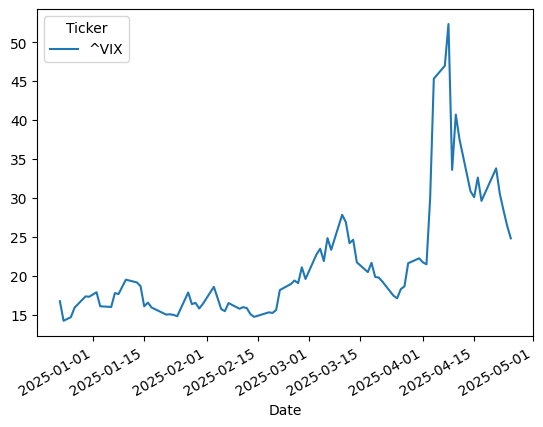

In [307]:
vix.Close.plot()

# testes

In [250]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler


dados = data
resultado = pd.DataFrame()
for acao in tickers:
    df = dados[acao].copy()
    df['Return'] = df['Close'].pct_change()
    df['Volatility'] = df['Return'].rolling(window=7).std()
    df['High-Low Range'] = (df['High'] - df['Low']) / df['Low']
    df = df[['Return', 'Volatility', 'High-Low Range']]
    df.columns = [f'{acao}_Return', f'{acao}_Volatility', f'{acao}_HLRange']
    
    if resultado.empty:
        resultado = df
    else:
        resultado = resultado.join(df)

resultado = resultado.dropna()

# Indicador de número de ações subindo/caindo
# 1 para subida, -1 para queda
up_down = resultado[[col for col in resultado.columns if 'Return' in col]].apply(lambda x: np.where(x > 0, 1, -1))
resultado['Acoes_Subindo'] = up_down.sum(axis=1) / len(acoes)

# Agora normalizar tudo
features = [col for col in resultado.columns if ('Return' in col or 'Volatility' in col or 'HLRange' in col)] + ['Acoes_Subindo']

scaler = MinMaxScaler()
scaled_features = scaler.fit_transform(resultado[features])

scaled = pd.DataFrame(scaled_features, columns=features, index=resultado.index)

# Cálculo final do Índice de Pânico/Otimismo
scaled['Panic Optimism Index'] = scaled.mean(axis=1)

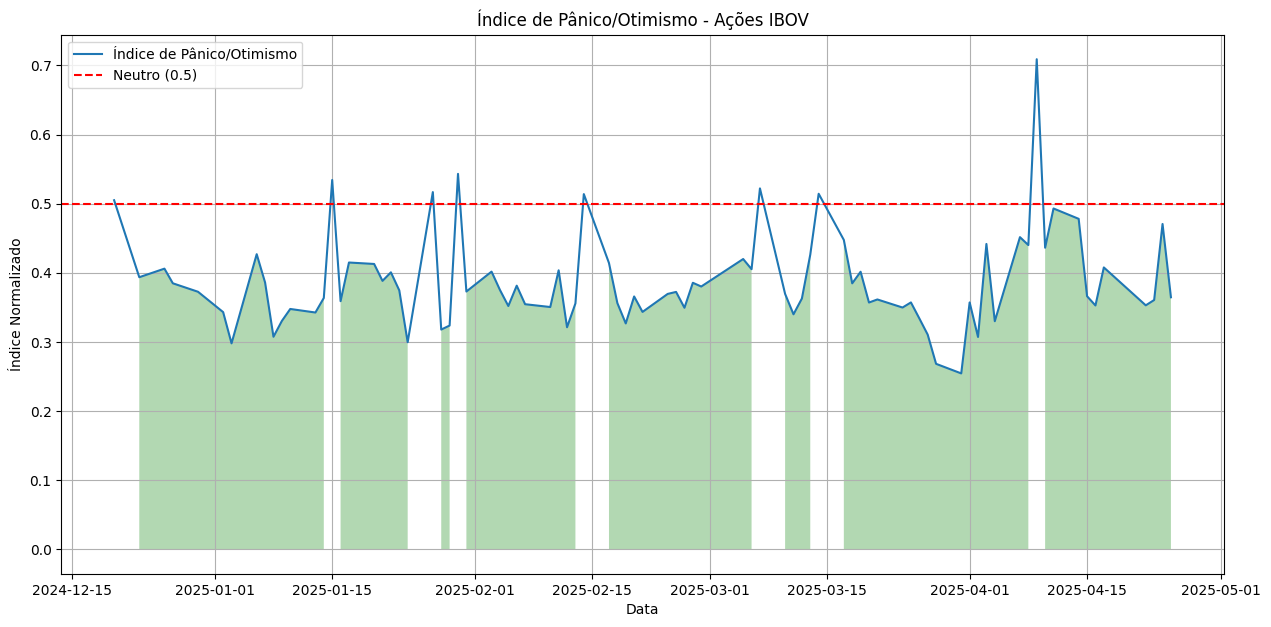

In [252]:
plt.figure(figsize=(15,7))
plt.plot(scaled.index, scaled['Panic Optimism Index'], label='Índice de Pânico/Otimismo')
plt.axhline(0.5, color='red', linestyle='--', label='Neutro (0.5)')
plt.fill_between(scaled.index, 0, scaled['Panic Optimism Index'], where=scaled['Panic Optimism Index']>=0.5, facecolor='red', alpha=0.3)
plt.fill_between(scaled.index, 0, scaled['Panic Optimism Index'], where=scaled['Panic Optimism Index']<0.5, facecolor='green', alpha=0.3)
plt.title('Índice de Pânico/Otimismo - Ações IBOV')
plt.xlabel('Data')
plt.ylabel('Índice Normalizado')
plt.legend()
plt.grid(True)
plt.show()